In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [2]:
data = pd.read_csv('./data/pca_data_arr_df.csv', header = None)
X_arr = data.values[:,1:]
y_arr = data.values[:,0]

In [3]:
print(X_arr.shape, y_arr.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr,y_arr,test_size=0.25,random_state=2019)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(119390, 418) (119390,)
(89542, 418) (29848, 418) (89542,) (29848,)


In [4]:
model = Sequential()

#adding dropout layers for improved learning
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop]
          )

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 89542 samples, validate on 29848 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
89542/89542 [==============================] - 5s 57us/sample - loss: 0.4653 - acc: 0.7652 - val_loss: 0.3413 - val_acc: 0.8442
Epoch 2/100
89542/89542 [==============================] - 5s 50us/sample - loss: 0.3881 - acc: 0.8080 - val_loss: 0.3276 - val_acc: 0.8519
Epoch 3/100
89542/89542 [==============================] - 4s 50us/sample - loss: 0.3766 - acc: 0.8308 - val_loss: 0.3178 - val_acc: 0.8567
Epoch 4/100
89542/89542 [==============================] - 4s 50us/sample - loss: 0.3681 - acc: 0.8384 - val_loss: 0.3104 - val_acc: 0.8622
Epoch 5/100
89542/89542 [==============================] - 5s 58us/sample - loss: 0.3620 - acc: 0.8396 - val_loss: 0.3071 - val_acc: 0.8630
Epoch 6/100
89542/89542 [==============================] - 5s 51us/sample - loss: 0.357

89542/89542 [==============================] - 4s 50us/sample - loss: 0.3051 - acc: 0.8718 - val_loss: 0.2495 - val_acc: 0.8948
Epoch 55/100
89542/89542 [==============================] - 4s 50us/sample - loss: 0.3021 - acc: 0.8734 - val_loss: 0.2522 - val_acc: 0.8943
Epoch 56/100
89542/89542 [==============================] - 4s 50us/sample - loss: 0.3009 - acc: 0.8727 - val_loss: 0.2482 - val_acc: 0.8955
Epoch 57/100
89542/89542 [==============================] - 4s 50us/sample - loss: 0.2981 - acc: 0.8736 - val_loss: 0.2466 - val_acc: 0.8930
Epoch 58/100
89542/89542 [==============================] - 4s 50us/sample - loss: 0.3007 - acc: 0.8734 - val_loss: 0.2526 - val_acc: 0.8949
Epoch 59/100
89542/89542 [==============================] - 4s 50us/sample - loss: 0.3012 - acc: 0.8736 - val_loss: 0.2489 - val_acc: 0.8980
Epoch 60/100
89542/89542 [==============================] - 4s 50us/sample - loss: 0.2979 - acc: 0.8756 - val_loss: 0.2476 - val_acc: 0.8973
Epoch 61/100
89542/89542 [

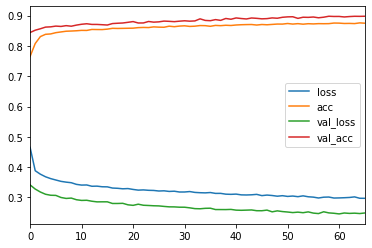

In [6]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [7]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     18732
         1.0       0.93      0.79      0.85     11116

    accuracy                           0.90     29848
   macro avg       0.91      0.88      0.89     29848
weighted avg       0.90      0.90      0.90     29848

[[18072   660]
 [ 2384  8732]]


In [8]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs')
LR.fit(X_train,y_train)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = LR.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87     18732
         1.0       0.82      0.69      0.75     11116

    accuracy                           0.83     29848
   macro avg       0.83      0.80      0.81     29848
weighted avg       0.83      0.83      0.83     29848

[[17062  1670]
 [ 3422  7694]]
